In [235]:
import matplotlib.pyplot as plt
import tifffile as tf
import numpy as np
from clones.vis.settings import *
%matplotlib inline

In [234]:
ls ../../../figures/images/control_disc28_l20to25/rfp.tif

../../../figures/images/control_disc28_l20to25/rfp.tif


In [ ]:

im = tf.imread('../../../figures/images/control_disc28_l20to25/rfp.tif')

In [ ]:
data = Measurements(rgb_im, segmentation.labels).build_dataframe()
data['gfp_corrected'] = data.g - (data.r*slope)

In [243]:
dapi

array([[ 79,  47,  73, ..., 158, 166, 123],
       [ 44,  67,  85, ..., 143, 155, 140],
       [ 47,  50,  61, ..., 120, 114, 152],
       ...,
       [ 85,  82, 114, ...,  26,  15,  15],
       [108, 105, 117, ...,  15,  15,  15],
       [ 99, 123, 117, ...,  15,  18,  20]], dtype=uint8)

In [233]:
from clones.data.images import ImageScalar, ImageRGB

In [3]:
rfp_path = '../../../figures/images/control_disc28_l20to25/rfp.tif'
im = tf.imread(rfp_path)

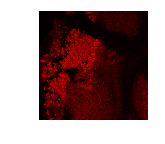

In [4]:
bit_depth = 2**12
rgb_im = np.stack((im.T,)*3).T
rgb_im[:,:,1:] = 0
rgb_im = rgb_im.astype(int) / bit_depth

fig, ax = plt.subplots(figsize=(2, 2))
ax.imshow(rgb_im)
ax.axis('off')
fig.savefig('graphics/clones.png', dpi=400, bbox_to_inches=0., transparent=True, frameon=False)

In [236]:
dapi_path = '../../../figures/images/control_disc28_l20to25/crop/dapi-crop.tif'
rfp_path = '../../../figures/images/control_disc28_l20to25/crop/rfp-crop.tif'
gfp_path = '../../../figures/images/control_disc28_l20to25/crop/gfp-crop.tif'
dapi = tf.imread(dapi_path)
rfp = tf.imread(rfp_path)
gfp = tf.imread(gfp_path)

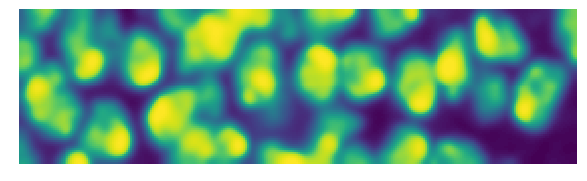

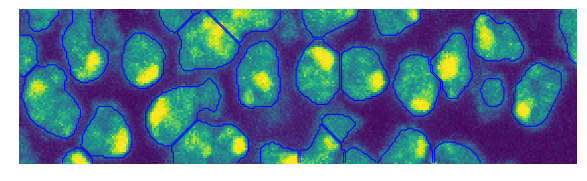

In [244]:
from clones.measurement.segmentation import Segmentation

preprocessed_nuclei = ImageScalar(dapi)
preprocessed_nuclei.preprocess(clip_limit=0.01, clip_factor=1)
_ = preprocessed_nuclei.show()
segmentation = Segmentation(preprocessed_nuclei, seg_kws={}, exclude_edges=False)
segmentation.exclude_small_segments(min_area=50)

image = ImageScalar(dapi, labels=segmentation.labels)
_ = image.show(color='b')

In [134]:
dapi_8bit.mas

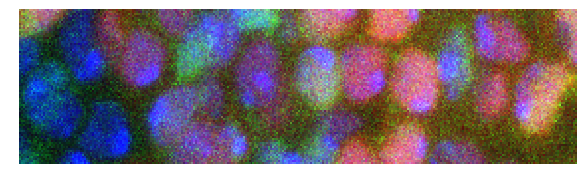

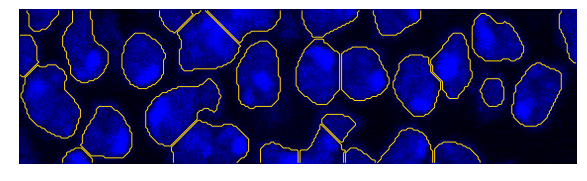

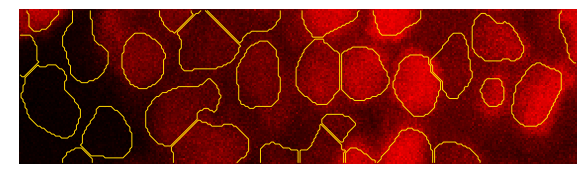

In [231]:
rgb_fig = rgb_image.show(segments=False)
dapi_fig = rgb_image.get_channel('b').show(cmap='b', color='gold', lw=1)
rfp_fig = rgb_image.get_channel('r').show(cmap='r', color='gold', lw=1)

rgb_fig.savefig('graphics/rgb.png', dpi=500, bbox_inches='tight', transparent=True)
dapi_fig.savefig('graphics/dapi.png', dpi=500, bbox_inches='tight', transparent=True)
rfp_fig.savefig('graphics/rfp.png', dpi=500, bbox_inches='tight', transparent=True)

In [227]:
gfp_image_corrected

In [153]:
from clones.measurement.measure import Measurements

In [172]:
data = Measurements(rgb_im, segmentation.labels).build_dataframe()
data['gfp_corrected'] = data.g - (data.r*slope)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


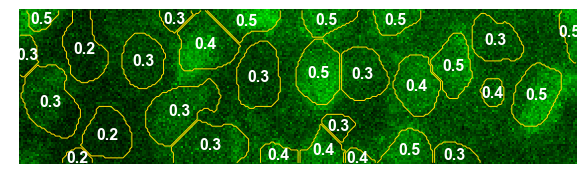

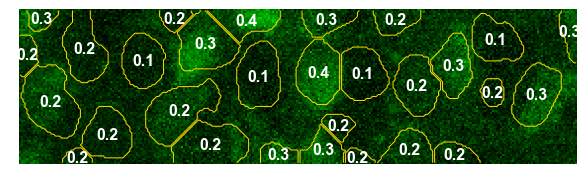

In [230]:
gfp_image = rgb_image.get_channel('g')
gfp_image_corrected = ImageScalar(gfp_image.im-(slope*rfp_image.im), labels=gfp_image.labels)


def draw_measurements(reference, data, field='g'):
    image = deepcopy(reference)
    for _id, nucleus in data.iterrows():
        ind = (image.labels==int(nucleus.segment_id)).nonzero()
        #image.im[ind] = nucleus[field]
    fig = image.show(cmap='g', color='gold')
    
    ax = fig.axes[0]
    
    for _id, nucleus in data.iterrows():
        level_str = '{:0.1f}'.format(nucleus[field])
        ax.text(nucleus.centroid_x, nucleus.centroid_y, level_str, fontsize=16, fontweight='bold',
                va='center', ha='center', color='w')
    return fig

fig_original = draw_measurements(gfp_image, data, field='g')
fig_corrected = draw_measurements(gfp_image_corrected, data, field='gfp_corrected')

fig_original.savefig('graphics/gfp_original.png', dpi=500, bbox_inches='tight', transparent=True)
fig_corrected.savefig('graphics/gfp_corrected.png', dpi=500, bbox_inches='tight', transparent=True)

In [137]:
dapi_8bit.im.max()

255

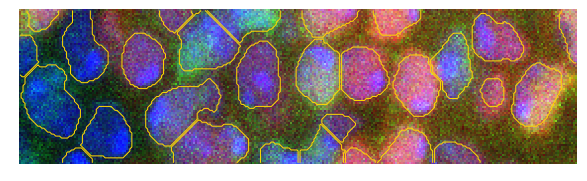

In [143]:
rgb_im_8bit = np.stack((rfp.T, gfp.T, dapi.T)).T
rgb_im = (rgb_im_8bit.astype(float)/2**8)

rgb_image = ImageRGB(rgb_im, labels=segmentation.labels)

_ = rgb_image.show(lw=1, color='gold')






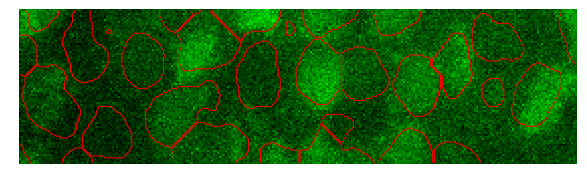

In [74]:
_ = rgb_image.get_channel('g').show(cmap='g')

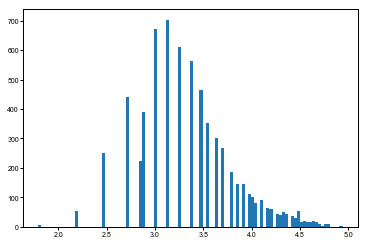

In [264]:
bg_mask = binary_erosion((segmentation.labels==0), iterations=3, border_value=1)
x = dapi[bg_mask].ravel()
_ = plt.hist(np.log(x), bins=100)

In [24]:
from clones.bleedthrough.correction import GLM, BackgroundExtraction

In [77]:
from scipy.ndimage import binary_erosion

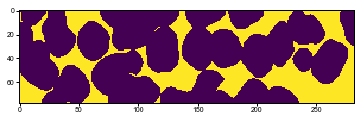

In [245]:
bg_mask = binary_erosion((segmentation.labels==0), iterations=3, border_value=1)
plt.imshow(bg_mask)

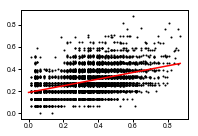

In [164]:
rfp_image = rgb_image.get_channel('r')
rfp_bg = rfp_image.im[bg_mask]
gfp_image = rgb_image.get_channel('g')
gfp_bg = gfp_image.im[bg_mask]

model = GLM(rfp_bg, gfp_bg)
intercept, slope = model.model.params

fig, ax = plt.subplots(figsize=(3, 2))
ax.scatter(rfp_bg, gfp_bg, s=1, c='k')
ax.plot(model.domain, model.predict(model.domain), '-r')

In [168]:
gfp_im_corrected = gfp_image.im-(slope*rfp_image.im)
gfp_image_corrected = ImageScalar(gfp_im_corrected, labels=gfp_image.labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


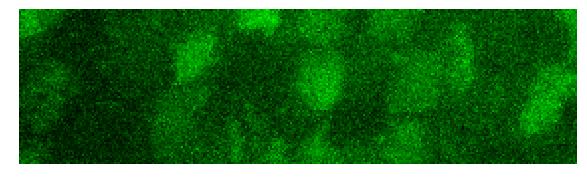

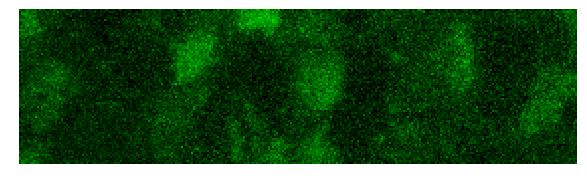

In [169]:
fig0 = gfp_image.show(cmap='g', segments=False)
fig1 = gfp_image_corrected.show(cmap='g', segments=False)

In [79]:
from clones.bleedthrough.models import GLM

In [81]:
model = GLM(x, y)

In [18]:

fig, ax = plt.subplots(figsize=(3, 2))

x, y = rfp.ravel(), gfp.ravel()
ax.scatter(x, y, s=1)
ax.plot(model.domain, model.predict(model.domain), '-r')

array([79, 47, 73, ..., 15, 18, 20], dtype=uint8)

In [ ]:
plt.hist(dapi[background])

([array([ 4., 23., 19., 15., 12.,  3.,  2.,  0.,  0.,  0.]),
  array([ 3., 19., 25., 12.,  8., 11.,  0.,  0.,  0.,  0.]),
  array([ 1., 15., 28., 11.,  9., 12.,  2.,  0.,  0.,  0.]),
  array([ 1., 10., 25., 17.,  7.,  9.,  7.,  2.,  0.,  0.]),
  array([ 2.,  8., 18., 21., 11.,  8.,  9.,  1.,  0.,  0.]),
  array([ 2., 11., 14., 17., 14.,  8.,  5.,  5.,  2.,  0.]),
  array([ 3., 11., 13., 15., 15.,  5.,  8.,  2.,  5.,  1.]),
  array([ 5., 13.,  8., 11., 15.,  9.,  8.,  2.,  5.,  2.]),
  array([ 6., 10.,  8., 14., 15.,  8.,  6.,  4.,  3.,  4.]),
  array([ 6., 15., 12.,  7., 12., 10.,  4.,  5.,  2.,  5.]),
  array([ 5., 23., 11.,  3.,  9., 10.,  7.,  4.,  3.,  3.]),
  array([ 8., 20.,  6., 11.,  6., 13.,  7.,  0.,  5.,  2.]),
  array([17., 14.,  6.,  8.,  5., 15.,  8.,  3.,  2.,  0.]),
  array([19., 10.,  5., 10.,  9., 13.,  9.,  2.,  1.,  0.]),
  array([15., 14.,  5.,  8., 11., 18.,  7.,  0.,  0.,  0.]),
  array([20.,  9.,  5.,  9., 14., 17.,  3.,  1.,  0.,  0.]),
  array([18., 12.,  6., 

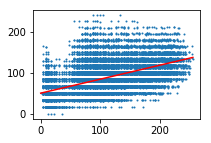